<b>Рынок заведений общественного питания Москвы</b>

<b> Описание проекта </b><br>
Инвесторы из фонда «Shut Up and Take My Money» решили попробовать себя в новой области и открыть заведение общественного питания в Москве. Заказчики ещё не знают, что это будет за место: кафе, ресторан, пиццерия, паб или бар, — и какими будут расположение, меню и цены.<br>
<b>Задача аналитика: </b><br>
Подготовить исследование рынка Москвы, найти интересные особенности и презентовать полученные результаты, которые в будущем помогут в выборе подходящего инвесторам места. <br>
Исследуем датасет с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Информация, размещённая в сервисе Яндекс Бизнес, могла быть добавлена пользователями или найдена в общедоступных источниках. Она носит исключительно справочный характер.<br>
<b>Описание данных</b><br>
Файл moscow_places.csv: <br>
name — название заведения;<br>
address — адрес заведения;<br>
category — категория заведения, например «кафе», «пиццерия» или «кофейня»;<br>
hours — информация о днях и часах работы;<br>
lat — широта географической точки, в которой находится заведение;<br>
lng — долгота географической точки, в которой находится заведение;<br>
rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);<br>
price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;<br>
avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона<br>
middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:<br>
middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:<br>
chain — число,  0 - заведение не является сетевым или 1 заведение является сетевым(для маленьких сетей могут встречаться ошибки):<br>
district — административный район, в котором находится заведение, например Центральный административный округ;<br>
seats — количество посадочных мест.<br>

## Шаг:  Загрузим данные и изучим общую информацию

In [52]:
# Необходимые библиотеки для исследования 
import pandas as pd
import re
import plotly.express as px
import matplotlib.pyplot as plt
import json
import warnings
warnings.filterwarnings("ignore")
from folium.plugins import MarkerCluster
from folium import Marker, Map, Choropleth
from plotly import graph_objects as go

In [53]:
# открываем файл с данными
places = pd.read_csv('/datasets/moscow_places.csv')

In [54]:
display(places.head())

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0


In [55]:
places.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


In [56]:
# заменим тип данных chain на логический
places['chain'] = places['chain'].astype('bool')
# заменим тип данных seats на целочисленный
#places['seats'] = places['seats'].astype('Int64')
places.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   bool   
 13  seats              4795 non-null   float64
dtypes: bool(1), float64(6), object(7)
memory usage: 862.1+ KB


В файле представлены данные о 8406 заведениях. 

На этом шаге мы загрузили необходимые для исследования библитеки и прочитали файл с данными. Также был изменени тип данных в столбце cahin на Bool и в столбце seats на целочисленный. Далее выполним предобработку данных. 

## Шаг . Выполним предобработку данных

In [57]:
# проверим наличие полных дубликатов
places.duplicated().sum()

0

Полных дубликатов нет.

In [58]:
# проверим неявные дубликаты 
places.duplicated(subset=['name', 'address']).sum()

0

При поиске по связке название и адресс неявных дубликатов не найдено

In [59]:
# проверим наличие пропусков в данных
places.isna().sum()

name                    0
category                0
address                 0
district                0
hours                 536
lat                     0
lng                     0
rating                  0
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
chain                   0
seats                3611
dtype: int64

Есть пропуски в столбцах hours, price, avg_bill, middle_avg_bill,middle_coffee_cup, seats

Пропусков среди 8406 записей довольно много, удалить мы их не можем. Не везде указаны часы работы, это не окажет влияниея на исследование, оставляем как есть. Не везде заполнено количество посадочных мест.Данные о цене и среднем чеке не заполнены более чем в половине данных, также оставляем их как есть.

In [61]:
places['chain'].value_counts()

False    5201
True     3205
Name: chain, dtype: int64

Среди заведений 3205 сетевые

In [62]:
print('Макс. количество посадочных мест', places['seats'].max())

Макс. количество посадочных мест 1288.0


In [63]:
print('Мин. количество посадочных мест', places['seats'].min())

Мин. количество посадочных мест 0.0


In [64]:
zero_seats=places['seats'][places['seats']==0].count()

In [65]:
print('Всего', zero_seats,'заведений с 0 количеством посадочных мест, включая заведения с незаполненным этим показателем.')
print('Это составляем', round(zero_seats/len(places)*100,2), 'процетов от общего числа заведений' )

Всего 136 заведений с 0 количеством посадочных мест, включая заведения с незаполненным этим показателем.
Это составляем 1.62 процетов от общего числа заведений


Добавим столбец адреса:

In [66]:
# функция поиска адреса
def find_addr(x):
    try:
        found = re.search(',(.+?),', x).group(1)
    except AttributeError:
        found = ''
    return found
places['street'] = places['address'].apply(find_addr)

In [67]:
# проверим адрес улицы на пропуски
places['street'][places['street']==''].count()

95

В 95 заведениях из 8406 улица в адресе не заполнена, оставим их в файле, в дальнейшем поставим фильтр на пустой адрес

Добавим столбец признака работы 24 часа

In [68]:
# функция 24/7
def find_247(x):
    if x=='ежедневно, круглосуточно':
        return True
    else:
        return False
places['is_24/7']=places['hours'].apply(find_247)

In [69]:
places['is_24/7'].value_counts()

False    7676
True      730
Name: is_24/7, dtype: int64

Проверим, что столбцы добавились:

In [70]:
places.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   bool   
 13  seats              4795 non-null   float64
 14  street             8406 non-null   object 
 15  is_24/7            8406 non-null   bool   
dtypes: bool(2), float64(6), 

В датасете добавились 2 новых столбца is24/7 и street

В файле 730 круглосуточных заведений.

На этом шаге мы выполнили предобработку данных. Полных дубликатов нет. Среди всех заведений 730 круглосуточные и 3205 сетевые. Были выявлены пропуски в данных.
Также были доавлены 2 дополнительных столбца - признак круглосуточного и столбец с названием улицы.
Далее будет произведен анализ данных.

## Шаг . Анализ данных

### Исследуем категории заведений

In [71]:
# Изучим типы заведений
places['category'].value_counts()

кафе               2378
ресторан           2043
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

Всего 9 типов заведений 

In [72]:
types = places.groupby('category', as_index=False).agg({'name':'count'}).sort_values(by='name', ascending=False)
fig = px.bar(types, y='name', x='category', text='name', color='category', width=800, height=500)
fig.update_xaxes(tickangle=30)
fig.update_layout(
    title='Соотношение видов объектов общественного питания по количеству',
    xaxis_title="Тип объекта",
    yaxis_title="Количество")
fig.update_traces(textposition='outside')

![Map3](https://github.com/Alex-tsyg/Yandex-Practicum/blob/main/Project9/img/g1.png?raw=true)

Больше всего представлено кафе - 2378, им чуть уступают рестораны - 2043 и меньше всего булочных - 256. 

### Исследуем количество посадочных мест в местах по категориям

In [73]:
# Составим сводную таблицу по типам с вычислением среднего количесвта мест
obj_seats = places.groupby('category', as_index=False).agg({'seats':'median'}).sort_values(by='category', ascending=False)
obj_seats.columns=['Тип', 'Среднее количество мест']
obj_seats=obj_seats.sort_values(by='Среднее количество мест', ascending = False).head(15).reset_index(drop=True)
obj_seats

,Тип,Среднее количество мест
0,ресторан,86.0
1,"бар,паб",82.5
2,кофейня,80.0
3,столовая,75.5
4,быстрое питание,65.0
5,кафе,60.0
6,пиццерия,55.0
7,булочная,50.0


In [74]:
# сохраним список категорий, он нам пригодится в дальнейшем
category = obj_seats['Тип'].tolist()

In [75]:
fig = px.bar(obj_seats, x='Тип', y='Среднее количество мест', 
             text = 'Среднее количество мест', color='Тип', width = 800, height = 500)
fig.update_layout(title={'text':'Среднее кол-во посадочных мест по видам объектов',
                        'x':0.125})
fig.show()

![](https://github.com/Alex-tsyg/Yandex-Practicum/blob/main/Project9/img/g2.png?raw=true)

Наибольшее среднее число посадочных мест у ресторанов - 86, наименьшее у булочных - 50. 

### Рассмотрим и изобразим соотношение сетевых и несетевых заведений

In [76]:
places['chain'].value_counts()

False    5201
True     3205
Name: chain, dtype: int64

In [77]:
fig = go.Figure(data=go.Pie(labels=places['chain'].value_counts().reset_index()['index'], values=places['chain'].value_counts()))
fig.update_layout(
    title={
        'text':'Соотношение сетевых и несетевых заведений по количеству',
        'y':0.9,
        'x':0.48})
for trace in fig.data:
    trace['labels']=['Несетевые', 'Сетевые']
fig.show()

![](https://github.com/Alex-tsyg/Yandex-Practicum/blob/main/Project9/img/g3.png?raw=true)

Сетевых заведений больше 61.9% против 38.1% не сетевых.

### Исследуем какие категории заведений чаще являются сетевыми?

In [78]:
# Составим сводную таблицу с данными о категории объекта, числе сетевых объектов, общем числе объектов 
# и долями от общего числа и от типа
chain_obj = ( places[places['chain']==True]
             .groupby('category'
            , as_index=False).agg({'name':'count'}).sort_values(by='name', ascending=False)
            )
chain_obj = chain_obj.merge(types[['category', 'name']], 
                                              left_on='category', right_on='category')
chain_obj.columns=['category','chain','all']
chain_obj['%_of_type'] = (chain_obj['chain'] / chain_obj['all']*100).round(2)
chain_obj

,category,chain,all,%_of_type
0,кафе,779,2378,32.76
1,ресторан,730,2043,35.73
2,кофейня,720,1413,50.96
3,пиццерия,330,633,52.13
4,быстрое питание,232,603,38.47
5,"бар,паб",169,765,22.09
6,булочная,157,256,61.33
7,столовая,88,315,27.94


In [79]:
fig = px.bar(chain_obj, x='category', y='chain', width = 800, height = 500, color='category', text='chain')
fig.update_xaxes(tickangle=30)
fig.update_layout(
    title='Количество сетевых объектов по категориям',
    xaxis_title="Тип объекта",
    yaxis_title="Количество")
fig.update_traces(textposition='outside')
fig.show()

![Map3](https://github.com/Alex-tsyg/Yandex-Practicum/blob/main/Project9/img/g4.png?raw=true)

В представленном файле наибольшее число сетевых объектов в категории кафе -779, ресторан -730, кофейня -720.<br>
Наименьшее число у столовых 88.

In [80]:
fig = px.bar(chain_obj.sort_values(by='%_of_type', ascending = False), 
             x='category', y='%_of_type', width = 800, height = 500, color='category', 
             text='%_of_type')
fig.update_xaxes(tickangle=30)
fig.update_layout(
    title='Доля сетевых объектов по категориям заведеий общественного питания',
    xaxis_title="Тип объекта",
    yaxis_title="% заведений")
fig.update_traces(textposition='outside')
fig.show()

![Map3](https://github.com/Alex-tsyg/Yandex-Practicum/blob/main/Project9/img/g5.png?raw=true)

При анализе % сетевых завеедний в каждом типе видим, что лидируют булочные 61.33%, пиццерии 52.13% и кофейни 50.96%. А меньше всего % сетевых в категории бар/паб 22.09%

### Сгруппируем данные по названиям заведений и найдем топ-15 популярных сетей в Москве

In [81]:
names=places[places['chain']==True].pivot_table(index='name', values='category', aggfunc='count').sort_values(by='name', ascending=False).reset_index()
names.columns=['name', 'count']
names_top_15 = names.sort_values(by='count', ascending = False).head(15).reset_index(drop=True)
names_top_15

,name,count
0,Шоколадница,120
1,Домино'с Пицца,76
2,Додо Пицца,74
3,One Price Coffee,71
4,Яндекс Лавка,69
5,Cofix,65
6,Prime,50
7,Хинкальная,44
8,КОФЕПОРТ,42
9,Кулинарная лавка братьев Караваевых,39


In [82]:
fig = px.bar(names_top_15, x='name', y='count', width = 800, height = 550, color='name', text='count')
fig.update_xaxes(tickangle=30)
fig.update_layout(
    title='Топ-15 сетей Москвы',
    xaxis_title="Название",
    yaxis_title="Количество заведений")
fig.update_traces(textposition='outside')
fig.show()

![Map3](https://github.com/Alex-tsyg/Yandex-Practicum/blob/main/Project9/img/g6.png?raw=true)

Лидирует Шоколадница. Среди лидеров видем известные всем названия Кафе Шоколадница, пиццерии Доминос Пицца и Додо Пицца.

### Какие административные районы Москвы присутствуют в датасете?

In [83]:
district=places.pivot_table(index='district', values='name', aggfunc='count').sort_values(by='name', ascending=False).reset_index()
district.columns=['distrinct','all']
district


,distrinct,all
0,Центральный административный округ,2242
1,Северный административный округ,900
2,Южный административный округ,892
3,Северо-Восточный административный округ,891
4,Западный административный округ,851
5,Восточный административный округ,798
6,Юго-Восточный административный округ,714
7,Юго-Западный административный округ,709
8,Северо-Западный административный округ,409


Больше всего заведений в ЦАО, меньше в СЗАО

Отобразим общее количество заведений и количество заведений каждой категории по районам

In [84]:
fig = px.bar(district, x='distrinct', y='all', width = 800, height = 550, color='distrinct', text='all')
fig.update_xaxes(tickangle=30)
fig.update_layout(
    title='Распеределние заведений по районам',
    xaxis_title="административные районы",
    yaxis_title="Количество заведений")
fig.update_traces(textposition='outside')
fig.show()

![](https://github.com/Alex-tsyg/Yandex-Practicum/blob/main/Project9/img/g7.png?raw=true)

Теперь расчитаем общее количество заведений каждой категории по районам

In [85]:
for value in category:
    district2=places[places['category']==value].pivot_table(index='district', values='name', aggfunc='count').sort_values(by='name', ascending=False).reset_index()
    district2.columns=['distrinct',value]
    district[value]=district2[value]    
display(district)

,distrinct,all,ресторан,"бар,паб",кофейня,столовая,быстрое питание,кафе,пиццерия,булочная
0,Центральный административный округ,2242,670,364,428,66,87,464,113,50
1,Северный административный округ,900,218,68,193,44,85,282,77,39
2,Южный административный округ,892,202,68,159,41,82,272,73,37
3,Северо-Восточный административный округ,891,189,63,150,40,71,269,72,28
4,Западный административный округ,851,182,53,131,40,67,264,71,27
5,Восточный административный округ,798,168,50,105,25,62,239,68,25
6,Юго-Восточный административный округ,714,160,38,96,24,61,238,64,25
7,Юго-Западный административный округ,709,145,38,89,18,58,235,55,13
8,Северо-Западный административный округ,409,109,23,62,17,30,115,40,12


Построим график c разбивкой по типам заведений

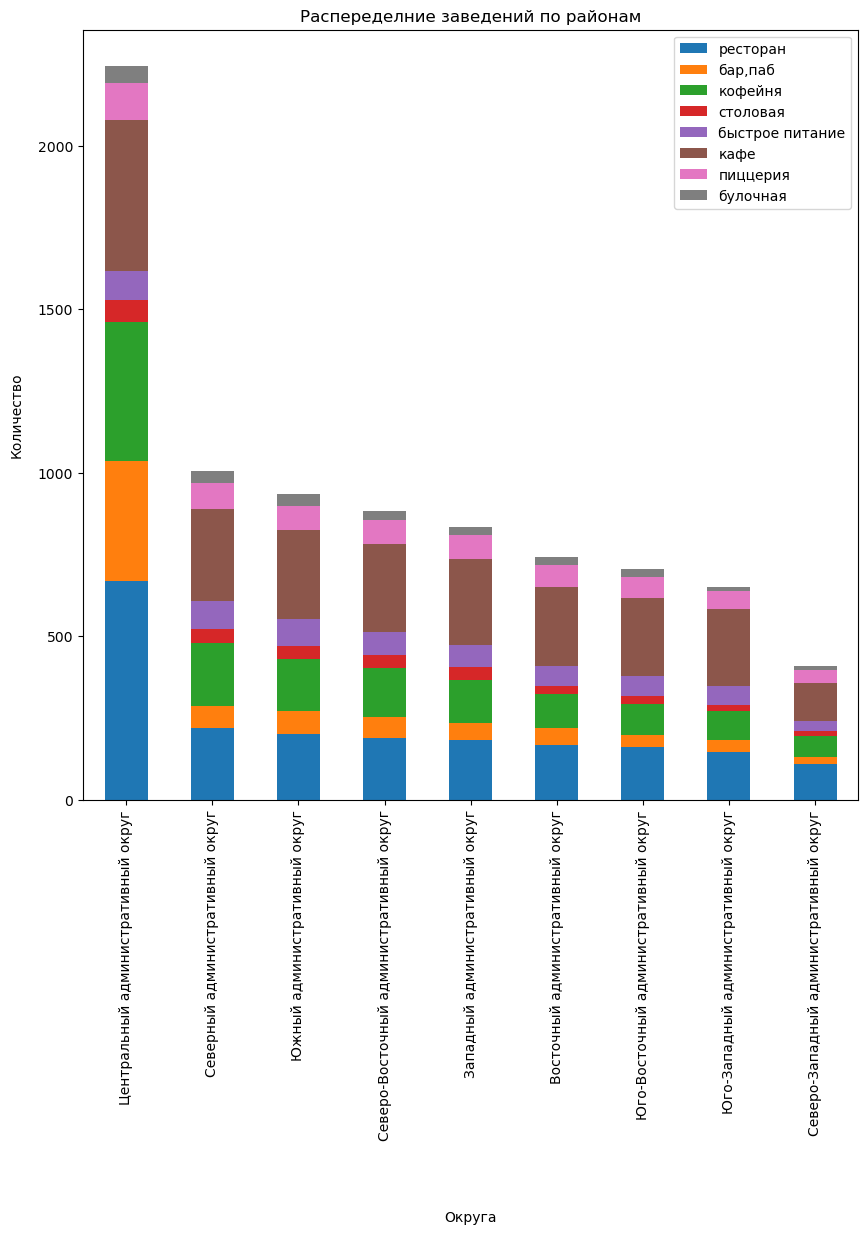

In [86]:
ax = district.plot(figsize = (10, 10), x='distrinct', y=category, kind='bar',stacked=True)
plt.title('Распеределние заведений по районам')
plt.ylabel('Количество', labelpad = 10)
plt.xlabel('Округа', labelpad = 50)
plt.show()

По числу заведений уверенно лидирует ЦАО

### Визуализируем распределение средних рейтингов по категориям заведений.

In [87]:
# Составим сводную таблицу с данными о категории объекта, числе сетевых объектов, общем числе объектов 
# и долями от общего числа и от типа
rating = ( places
             .groupby('category'
            , as_index=False).agg({'rating':'mean'})
            )
rating['rating']=round(rating['rating'],2)
rating=rating.sort_values(by='rating', ascending=False).reset_index()

In [88]:
rating

,index,category,rating
0,0,"бар,паб",4.39
1,5,пиццерия,4.30
2,6,ресторан,4.29
3,4,кофейня,4.28
4,1,булочная,4.27
5,7,столовая,4.21
6,3,кафе,4.12
7,2,быстрое питание,4.05


In [89]:
fig = px.bar(rating, x='category', y='rating', width = 800, height = 550, color='category', text='rating')
fig.update_xaxes(tickangle=30)
fig.update_layout(
    title='Распеределние  средних рейтингов по категориям заведений',
    xaxis_title="категории заведений",
    yaxis_title="рейтинг")
fig.update_traces(textposition='outside')
fig.show()

![](https://github.com/Alex-tsyg/Yandex-Practicum/blob/main/Project9/img/g8.png?raw=true)

Средний рейтинг примерно на одном уровне, чуть впереди "бар,паб", а наименьший средний рейтинг у "быстрого питания".

### Построим фоновую картограмму (хороплет) со средним рейтингом заведений каждого района. 

In [90]:
# для каждого округа посчитаем медианный рейтинг торговых центров, которые находятся на его территории:
rating_df = places.groupby('district', as_index=False)['rating'].agg('median')
rating_df

,district,rating
0,Восточный административный округ,4.3
1,Западный административный округ,4.3
2,Северный административный округ,4.3
3,Северо-Восточный административный округ,4.2
4,Северо-Западный административный округ,4.3
5,Центральный административный округ,4.4
6,Юго-Восточный административный округ,4.2
7,Юго-Западный административный округ,4.3
8,Южный административный округ,4.3


In [124]:
# загружаем JSON-файл с границами округов Москвы
state_geo = 'c://1/admin_level_geomap.geojson'
#state_geo=path
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=rating_df,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Медианный рейтинг заведений по районам',
).add_to(m)

# выводим карту
#m

![Map1](https://github.com/Alex-tsyg/Yandex-Practicum/blob/main/Project9/img/map1.png?raw=true)

По карте видно, что у заведений в центре Москвы рейтинг выше.

### Отобразим все заведения датасета на карте с помощью кластеров средствами библиотеки folium.

In [123]:
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
# создаём пустой кластер, добавляем его на карту
marker_cluster = MarkerCluster().add_to(m)

# пишем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его в кластер marker_cluster
def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)

# применяем функцию create_clusters() к каждой строке датафрейма
places.apply(create_clusters, axis=1)

# выводим карту
#m

0       None
1       None
2       None
3       None
4       None
        ... 
8401    None
8402    None
8403    None
8404    None
8405    None
Length: 8406, dtype: object

![](https://github.com/Alex-tsyg/Yandex-Practicum/blob/main/Project9/img/map2.png?raw=true)

![](Project9/map2.png)

### Найдем топ-15 улиц по количеству заведений. 

In [95]:
# сгруппируем по улице, исключим строки где адрес пустой
places_filt=places[places['street']!='']
top_str = places_filt.groupby('street', as_index=False).agg({'name':'count'}).sort_values(by='street', ascending=False)
top_str.columns = ['street', 'all']
top_15 = top_str.sort_values(by='all', ascending = False).head(15).reset_index(drop=True)
display(top_15)

,street,all
0,проспект Мира,184
1,Профсоюзная улица,122
2,проспект Вернадского,108
3,Ленинский проспект,107
4,Ленинградский проспект,95
5,Дмитровское шоссе,88
6,Каширское шоссе,77
7,Варшавское шоссе,75
8,Ленинградское шоссе,69
9,МКАД,65


In [96]:
fig = px.bar(top_15, x='street', y='all', 
             color='street', width = 900, height = 550, text='all')
fig.update_xaxes(tickangle=45)
fig.update_layout(
    title='Топ-15 улиц с наибольшим количеством заведений',
    xaxis_title="Улица",
    yaxis_title="Количество заведений")
fig.show()

![](https://github.com/Alex-tsyg/Yandex-Practicum/blob/main/Project9/img/g9.png?raw=true)

Больше всего заведений находится на Пропекте мира.

### Найдем улицы, на которых находится только один объект общепита.

In [97]:
one_object = top_str[top_str['all']==1]
print('Всего улиц с одни объектом общественного питания: {}, что составляет {:.1%} от всего кол-ва улиц'\
      .format(len(one_object), (len(one_object)/len(top_str))))

Всего улиц с одни объектом общественного питания: 422, что составляет 30.3% от всего кол-ва улиц


In [98]:
# выберем записи с одним объектом
places_one=places[places.street.isin(one_object.street)].sort_values(by='street', ascending=False)

In [99]:
one_obj = ( places_one
             .groupby('category'
            , as_index=False).agg({'name':'count'}).sort_values(by='name', ascending=False)
            )
one_obj.columns = ['категория', 'количество']
one_obj

,категория,количество
3,кафе,143
6,ресторан,90
4,кофейня,75
0,"бар,паб",38
7,столовая,36
2,быстрое питание,19
5,пиццерия,14
1,булочная,7


In [100]:
fig = px.bar(one_obj, x='категория', y='количество', 
             color='категория', width = 900, height = 550, text='количество')
fig.update_xaxes(tickangle=45)
fig.update_layout(
    title='Типы заведений среди улиц с одним объектом',
    xaxis_title="Категория",
    yaxis_title="Количество заведений")
fig.show()

![](https://github.com/Alex-tsyg/Yandex-Practicum/blob/main/Project9/img/g10.png?raw=true)

Если на улице всего один объект, то это в большинстве случев кафе, реже всего булочная.

### Используя столбец "middle_avg_bill" посчитаем медиану этого столбца для каждого района. Используем это значение в качестве ценового индикатора района. Построим фоновую картограмму (хороплет) с полученными значениями для каждого района. 

In [101]:
# Исключим строки где не указан средний счет
places_f=places.dropna(subset = ['middle_avg_bill'])
district_price =places_f.pivot_table(index='district', values='middle_avg_bill', aggfunc='median').sort_values(by='district', ascending=False).reset_index()
district_price.columns=['distrinct','price']
district_price

,distrinct,price
0,Южный административный округ,500.0
1,Юго-Западный административный округ,600.0
2,Юго-Восточный административный округ,450.0
3,Центральный административный округ,1000.0
4,Северо-Западный административный округ,700.0
5,Северо-Восточный административный округ,500.0
6,Северный административный округ,650.0
7,Западный административный округ,1000.0
8,Восточный административный округ,575.0


In [122]:
# загружаем JSON-файл с границами округов Москвы
state_geo = 'c://1/admin_level_geomap.geojson'
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=district_price,
    columns=['distrinct', 'price'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Медианный рейтинг среднего чека по районам',
).add_to(m)

# выводим карту
#m

![Map3](https://github.com/Alex-tsyg/Yandex-Practicum/blob/main/Project9/img/map5.png?raw=true)

Средний чек выше в ЦАО и ЗАО, дешевле в СВАО, ЮАО и ЮЗАО. При удалении от центра средний чек падает, исключение ЗАО. Диапазон среднего чека от 450 до 1000 рублей.

### Выводы

* Больше всего представлено кафе - 2378, им чуть уступают рестораны - 2043 и меньше всего булочных - 256. 
* Наибольшее среднее число посадочных мест у ресторанов - 86, наименьшее у булочных - 50.
* Сетевых заведений больше 61.9% против 38.1% не сетевых.
* В представленном файле наибольшее число сетевых объектов в категории кафе -779, ресторан -730, кофейня -720.
Наименьшее число у столовых 88.
* При анализе % сетевых завеедний в каждом типе видим, что лидируют булочные 61.33%, пиццерии 52.13% и кофейни 50.96%. А меньше всего % сетевых в категории бар/паб 22.09%
* Среди Top-15 заведений лидируют всем известная сеть Шоколадница. Среди лидеров также видем известные всем названия пиццерии Доминос Пицца и Додо Пицца.
* Больше всего заведений в ЦАО, меньше в СЗАО
* Средний рейтинг примерно на одном уровне, чуть впереди "бар,паб", а наименьший средний рейтинг у "быстрого питания". По карте видно, что у заведений в центре Москвы рейтинг выше.
* Больше всего заведений находится на Пропекте мира.
* Если на улице всего один объект, то это в большинстве случев кафе, реже всего булочная.
* Средний чек выше в ЦАО и ЗАО, дешевле в СВАО, ЮАО и ЮЗАО. При удалении от центра средний чек падает, исключение ЗАО. Диапазон среднего чека от 450 до 1000 рублей.

## Детализируем исследование: открытие кофейни

### Сколько всего кофеен в датасете

In [105]:
coffe=places[places['category']=='кофейня']
print('Всего в датасете ',len(coffe),' заведений типа кофейня')

Всего в датасете  1413  заведений типа кофейня


In [106]:
coffe_place =coffe.pivot_table(index='district', values='name', aggfunc='count').sort_values(by='district', ascending=False).reset_index()
coffe_place.columns=['distrinct','count']
coffe_place=coffe_place.sort_values(by='count', ascending=False).reset_index(drop=True)
coffe_place

,distrinct,count
0,Центральный административный округ,428
1,Северный административный округ,193
2,Северо-Восточный административный округ,159
3,Западный административный округ,150
4,Южный административный округ,131
5,Восточный административный округ,105
6,Юго-Западный административный округ,96
7,Юго-Восточный административный округ,89
8,Северо-Западный административный округ,62


In [107]:
fig = px.bar(coffe_place, x='distrinct', y='count', 
             color='distrinct', width = 900, height = 550, text='count')
fig.update_xaxes(tickangle=45)
fig.update_layout(
    title='Количесвто кофеен по районам',
    xaxis_title="РАйон",
    yaxis_title="Количество")
fig.show()

![Map3](https://github.com/Alex-tsyg/Yandex-Practicum/blob/main/Project9/img/g11.png?raw=true)

Больше всего кофеен в ЦАО, меньше всего в СЗАО.

### Есть ли круглосуточные кофейни

In [108]:
print('Всего', len(coffe[coffe['is_24/7']]), 'кофеен из',len(coffe), 'работают круглосуточно')

Всего 59 кофеен из 1413 работают круглосуточно


### Какие у кофеен рейтинги? Как они распределяются по районам?

In [109]:
coffe_rating =coffe.pivot_table(index='district', values='rating', aggfunc='mean').sort_values(by='district', ascending=False).reset_index()
coffe_rating.columns=['distrinct','rating']
coffe_rating['rating']=round(coffe_rating['rating'],2)
coffe_rating=coffe_rating.sort_values(by='rating', ascending=False).reset_index(drop=True)
coffe_rating

,distrinct,rating
0,Центральный административный округ,4.34
1,Северо-Западный административный округ,4.33
2,Северный административный округ,4.29
3,Юго-Западный административный округ,4.28
4,Восточный административный округ,4.28
5,Южный административный округ,4.23
6,Юго-Восточный административный округ,4.23
7,Северо-Восточный административный округ,4.22
8,Западный административный округ,4.20


In [110]:
fig = px.bar(coffe_rating, x='distrinct', y='rating', 
             color='distrinct', width = 900, height = 550, text='rating')
fig.update_xaxes(tickangle=45)
fig.update_layout(
    title='СРедний рейтинг кофеен по районам',
    xaxis_title="РАйон",
    yaxis_title="Рейтинг")
fig.show()

![Map3](https://github.com/Alex-tsyg/Yandex-Practicum/blob/main/Project9/img/g12.png?raw=true)

In [ ]:
# загружаем JSON-файл с границами округов Москвы
state_geo = 'c://1/admin_level_geomap.geojson'
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=coffe_rating,
    columns=['distrinct', 'rating'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Медианный рейтинг заведений по районам',
).add_to(m)

# выводим карту
#m

![Map3](https://github.com/Alex-tsyg/Yandex-Practicum/blob/main/Project9/img/map3.png?raw=true)

Рейтинг выше у кофеен в ЦАИ и СЗАО.

### На какую стоимость чашки капучино стоит ориентироваться при открытии и почему?

In [113]:
# Исключим строки где не указан средний счет
coffe_f=coffe.dropna(subset = ['middle_coffee_cup'])
coffe_price =coffe_f.pivot_table(index='district', values='middle_coffee_cup', aggfunc='median').sort_values(by='district', ascending=False).reset_index()
coffe_price.columns=['distrinct','price']
coffe_price=coffe_price.sort_values(by='price', ascending=False).reset_index(drop=True)
coffe_price

,distrinct,price
0,Юго-Западный административный округ,198.0
1,Центральный административный округ,190.0
2,Западный административный округ,189.0
3,Северо-Западный административный округ,165.0
4,Северо-Восточный административный округ,162.5
5,Северный административный округ,159.0
6,Южный административный округ,150.0
7,Юго-Восточный административный округ,147.5
8,Восточный административный округ,135.0


При открытии новой кофейни нужно учитывать среднюю стоимость чашки по району. Цена чашки не должна превышать среднюю по району и находится в интевале от 135 до 198 рублей.

В ЦАО, ЮЗАО и ЗАО средняя стоимость чашки кофе выше, в ВАО средняя стоимость чашки минимальна.

<b>Выводы</b>
* При открытии кофейни следует учитывать конкурецию. Больше всего объектов расположено в ЦАО, причес в ЮЗАО объектов меньше при высокой средней стоимости чашки.
* Всего 59 кофеен из 1413 работают круглосуточно, открыв круглосуточное заведение есть хороший шанс получить конкурентное преимущество.
* В СЗАО плотность кофеен меньше.
* Также в ходе исследования были выявлены улицы всего с одним объектом, который не часто является кофейней, перед открытием можно подробнее исслеовать плотность застройки этих локаций, чтобы открыть точку с меньшей конкуренцией.

## Презентация

Презентация: <a href="https://github.com/Alex-tsyg/Yandex-Practicum/blob/main/Project9/obchepit.pdf?raw=true">https://github.com/Alex-tsyg/Yandex-Practicum/blob/main/Project9/obchepit.pdf</a>